# Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones

Brenda Zurazy Rodríguez Pérez

**A01793984**

Materia: Ciencia y analítica de Datos

Profesor: María de la Paz Rico Fernández


**27/octubre/2022**

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [1]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-------Valores y vector propio--------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B=W.dot(D).dot(Winv) 
print(B)
print("--------El resultado es igual a la matriz A-------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-------Valores y vector propio--------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
--------El resultado es igual a la matriz A-------


# Matriz A1

In [46]:
#Matriz A1
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original A1-------")
print(A1)

#Valores y vector propio de A1
values1, vectors1 = eig(A1)
print("-------Valores y vector propio A1--------")
print(values1) #D1
print(vectors1) #W1

#Matriz reconstruida de A1
values1, vectors1 = np.linalg.eig(A1)
W1 = vectors1
Winv1 = np.linalg.inv(W1)
D1 = np.diag(values1)
print("-------Matriz reconstruida A1-------")
B01=W1.dot(D1).dot(Winv1) 
B1=np.round(B01.real)
print(B1)

-------Matriz original A1-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-------Valores y vector propio A1--------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida A1-------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]


# Matriz A2

In [48]:
#Matriz 2
A2 = array([[1, 3, 8], [2, 0, 0], [0, 1, 1]])
print("-------Matriz original A2-------")
print(A2)

#Valores y vector propio de A2
values2, vectors2 = eig(A2)
print("-------Valores y vector propio A2--------")
print(values2) #D2
print(vectors2) #W2

#Matriz reconstruida de A2
values2, vectors2 = np.linalg.eig(A2)
W2 = vectors2
Winv2 = np.linalg.inv(W2)
D2 = np.diag(values2)
print("-------Matriz reconstruida A2-------")
B02=np.abs(W2.dot(D2).dot(Winv2))
B2=np.round(B02.real)
print(B2)

-------Matriz original A2-------
[[1 3 8]
 [2 0 0]
 [0 1 1]]
-------Valores y vector propio A2--------
[ 3.92379129+0.j         -0.96189565+1.27409273j -0.96189565-1.27409273j]
[[-0.88038364+0.j          0.35651441-0.47222629j  0.35651441+0.47222629j]
 [-0.44874132+0.j         -0.7412746 +0.j         -0.7412746 -0.j        ]
 [-0.15347926+0.j          0.26575498+0.17258639j  0.26575498-0.17258639j]]
-------Matriz reconstruida A2-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 1. 1.]]


# Matriz A3

In [49]:
#Matriz 3
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original A3-------")
print(A3)

#Valores y vector propio de A3
values3, vectors3 = eig(A3)
print("-------Valores y vector propio A3--------")
print(values3) #D3
print(vectors3) #W3

#Matriz reconstruida de A3
values3, vectors3 = np.linalg.eig(A3)
W3 = vectors3
Winv3 = np.linalg.inv(W3)
D3 = np.diag(values3)
print("-------Matriz reconstruida A3-------")
B03=np.abs(W3.dot(D3).dot(Winv3))
B3=np.round(B03.real)
print(B3)

-------Matriz original A3-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-------Valores y vector propio A3--------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida A3-------
[[ 5.  4.  0.]
 [ 1.  0.  1.]
 [10.  7.  1.]]


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


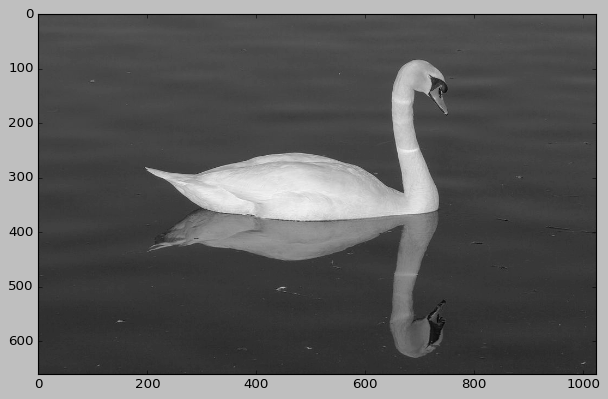

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F8AAFDD1250>


In [96]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [97]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [98]:
U.shape

(660, 660)

In [99]:
V.shape

(1024, 1024)

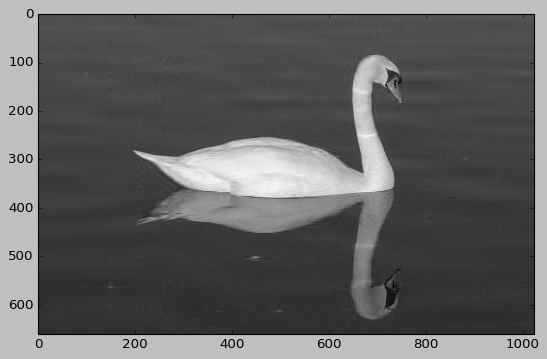

Felicidades la imagen está comprimida


In [100]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

# Imágen 1

[239. 238. 230. ...  29.  68.  69.]


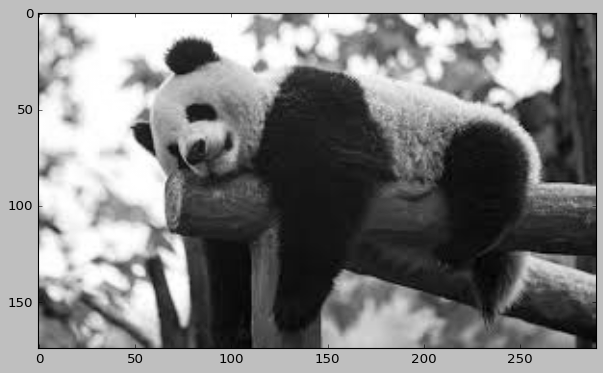

<PIL.Image.Image image mode=LA size=290x174 at 0x7F8AB00083D0>


In [110]:
#imagen 1

plt.style.use('classic')
img1 = Image.open(urllib.request.urlopen('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSmT-Lko2D1v6Ip2-6oHw3Rs6ucEr12JZMLyw&usqp=CAU')).convert('LA')

imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)

print(imgmat1)

imgmat1.shape = (imggray1.size[1],imggray1.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='gray')
plt.show()
print(img1)

In [111]:
U1,D1,V1 = np.linalg.svd(imgmat1)
imgmat1.shape

(174, 290)

In [112]:
U1.shape

(174, 174)

In [114]:
V1.shape

(290, 290)

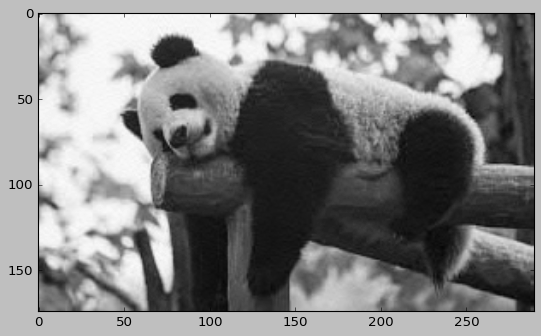

La imagen está comprimida


In [113]:
#juega con el valor nvalue y ve que pasa con otros valores
nvalue1 = 80
#------------------------------
reconstimg1 = np.matrix(U1[:,:nvalue1])*np.diag(D1[:nvalue1])*np.matrix(V1[:nvalue1,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(174X174)D(174X290)V(290x290)
        #=U(174Xnvalues)D(nvaluesXnvalue)V(nvaluesx290)

        #=U(174X80)(80X80)(80X290)
plt.imshow(reconstimg1,cmap='gray')
plt.show()
print("La imagen está comprimida")

# Imágen 2

[89. 89. 89. ... 76. 76. 73.]


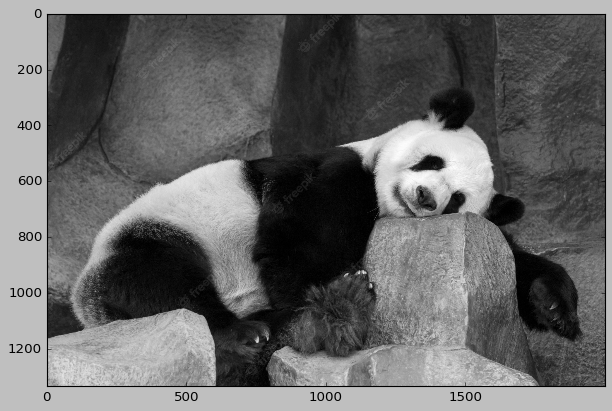

<PIL.Image.Image image mode=LA size=2000x1333 at 0x7F8AAFB9A110>


In [115]:
#imagen 2
plt.style.use('classic')
img2 = Image.open(urllib.request.urlopen('https://img.freepik.com/fotos-premium/imagen-panda-durmiendo-rocas-animales-salvajes_132416-1371.jpg?w=2000')).convert('LA')

imggray2 = img2.convert('LA')
imgmat2 = np.array(list(imggray2.getdata(band=0)),float)

print(imgmat2)

imgmat2.shape = (imggray2.size[1],imggray2.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat2,cmap='gray')
plt.show()
print(img2)

In [116]:
U2,D2,V2 = np.linalg.svd(imgmat2)
imgmat2.shape

(1333, 2000)

In [117]:
U2.shape

(1333, 1333)

In [118]:
V2.shape

(2000, 2000)

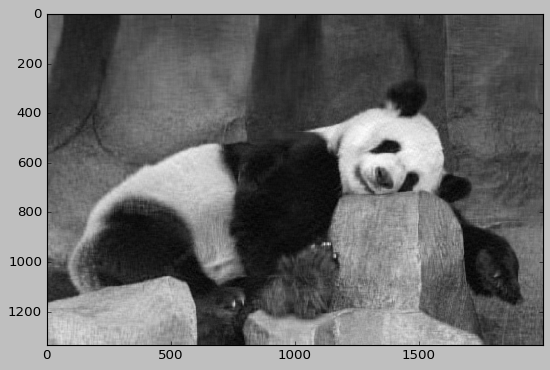

La imagen está comprimida


In [124]:
#juega con el valor nvalue y ve que pasa con otros valores
nvalue2 = 60
#------------------------------
reconstimg2= np.matrix(U2[:,:nvalue2])*np.diag(D2[:nvalue2])*np.matrix(V2[:nvalue2,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(1333X1333)D(1333X2000)V(2000x2000)
        #=U(174Xnvalues)D(nvaluesXnvalue)V(nvaluesx290)

        #=U(174X80)(60X60)(60X290)
plt.imshow(reconstimg2,cmap='gray')
plt.show()
print("La imagen está comprimida")

# Imágen 3

[114. 113. 112. ...  20.  20.  20.]


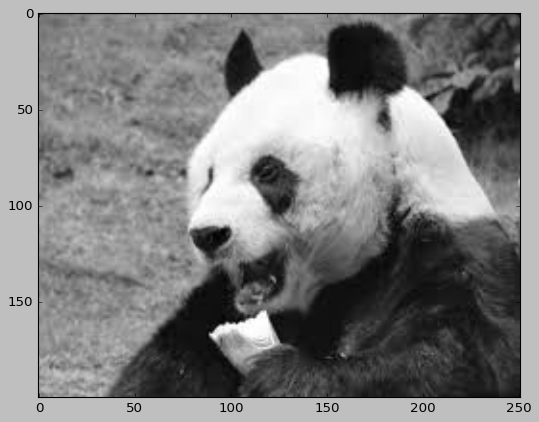

<PIL.Image.Image image mode=LA size=251x200 at 0x7F8AAF897590>


In [128]:
#imagen 3
plt.style.use('classic')
img3 = Image.open(urllib.request.urlopen('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRXKOnJM7y9sfwJK2p-Gv3mhvQU784cwGEC9Q&usqp=CAU')).convert('LA')

imggray3 = img3.convert('LA')
imgmat3 = np.array(list(imggray3.getdata(band=0)),float)

print(imgmat3)

imgmat3.shape = (imggray3.size[1],imggray3.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat3,cmap='gray')
plt.show()
print(img3)

In [129]:
U3,D3,V3 = np.linalg.svd(imgmat3)
imgmat3.shape

(200, 251)

In [130]:
U3.shape

(200, 200)

In [131]:
V3.shape

(251, 251)

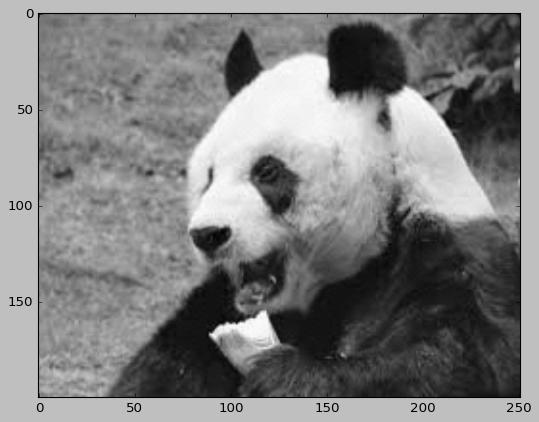

La imagen está comprimida


In [136]:
#juega con el valor nvalue y ve que pasa con otros valores
nvalue3 = 100
#------------------------------
reconstimg3= np.matrix(U3[:,:nvalue3])*np.diag(D3[:nvalue3])*np.matrix(V3[:nvalue3,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(200X200)D(200X251)V(251x251)
        #=U(200Xnvalues)D(nvaluesXnvalue)V(nvaluesx251)

        #=U(200X100)(100X100)(100X251)
plt.imshow(reconstimg3,cmap='gray')
plt.show()
print("La imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [78]:
#tu codigo aqui

#Importando las librerías que se utilizarán 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

# Cargando los datos
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

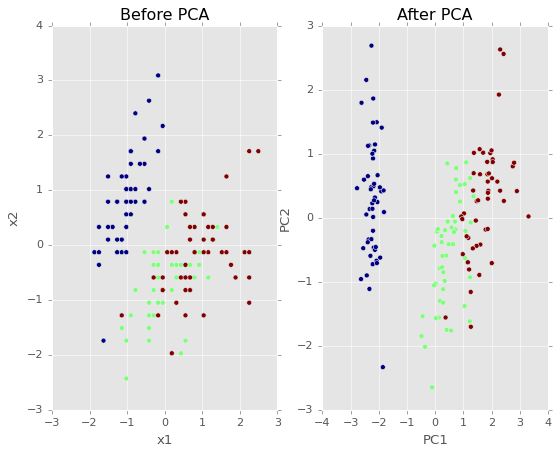

In [80]:
#Se grafica la información antes del PCA y después del PCA, agregando el color según el tipo de flor
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [81]:
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


Vemos que el primer componente explica el 73% de la variación de los datos, mientras que el segundo componente explica el 23% de la varianza de los datos.

In [85]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


## Preguntas

**1. ¿Qué es feature importance y para que nos sirve?**

Es la importancia que tiene cada variable por Componente Principal, se podría decir que cada variable obtiene un  peso específico por componente, esto se identifica a través del valor de las entradas de los vectores propios, a mayor magnitud mayor importancia por variable. Así es como podemos interpretar cada Componente Principal que decidamos tomar o que se necesiten tomar.


**2. Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**


a. Con dos componentes principales obtenemos aproximadamente 96% de la variación de los datos

b. Respecto al primer componente podemos afirmar que las variables 1,3 y 4 son las que más influyen en este componente.

c. Respecto al segundo componente la influencia de la segunda variable es mayor que las demás.

d. De tener una base de datos con dimensión 4, con el Análisis de Componenetes Principales se reduce la dimensión a 2 con aproximadamente el 96% de la variación total de los datos iniciales.

**3. ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

Sería de utilidad cuando se tenga bases de datos con dimensión alta, esto permite simplificar la complejidad con un poco de pérdida de la información, es decir, permite condensar la información de muchas variables en unas pocas, las cuales se conocen como Componentes Principales.

A su vez, puede ser utilizado como un modelo para métodos no supervisados para agrupar observaciones.